# Exploratory Data Analysis (EDA)

  ###      Import necessary libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import nltk
# # nltk.download()
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.dates as mdates
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

## AAPL Historical Data and News data

In [4]:
news_data=pd.read_csv('../docs/raw_analyst_ratings.csv')
stock_data=pd.read_csv('../docs/yfinance_data/AAPL_historical_data.csv')


#### Financial News Datasets

In [5]:
news_data.head(n=10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [6]:
news_data.shape

(1407328, 6)

#### AAPL Historical Datasets

In [7]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [8]:
stock_data.shape

(10998, 9)

##### Our news and AAPL Dataset have no a missing value

In [9]:
news_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [10]:
stock_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

## Descriptive Statistics

### Headline length of news data

In [78]:
headline_lengths = news_data['headline'].apply(len)


In [79]:
headline_lengths.head(n=20)

0      39
1      42
2      29
3      44
4      87
5      71
6      73
7     120
8      84
9      42
10     47
11     84
12     49
13    120
14     94
15     35
16     78
17     81
18     88
19     68
Name: headline, dtype: int64

In [71]:
np.round(headline_lengths.describe(),2) 

count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline, dtype: float64

### Number of articles in specific date


In [80]:
publisher_date_counts = news_data['date'].value_counts()
publisher_date_counts.head(n=10)

date
2020-03-12 00:00:00-04:00    1766
2020-02-27 00:00:00-04:00    1292
2020-02-28 00:00:00-04:00    1239
2019-08-01 00:00:00-04:00    1228
2020-03-06 00:00:00-04:00    1147
2018-08-02 00:00:00-04:00    1138
2009-08-10 00:00:00-04:00    1130
2018-10-30 00:00:00-04:00    1129
2018-07-26 00:00:00-04:00    1125
2019-07-31 00:00:00-04:00    1116
Name: count, dtype: int64

### Sentiment analysis 

In [76]:
# news_data['date']=pd.to_datetime(news_data['date'])
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [77]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_data['sentiment_line'] = news_data['headline'].apply(get_sentiment)


In [83]:
news_data.head()


,Unnamed: 0,headline,url,publisher,date,stock,sentiment_line,sentiment_unique
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0,0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0,0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0,0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0,0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0,0


### convert positive-value into positive, negative-value into negative and 0 into neutral

In [87]:
news_data['sentiment_unique'] = news_data['sentiment_line'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))


In [89]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_line,sentiment_unique
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0,neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0,neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0,neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0,neutral


<Axes: title={'center': 'Sentiment Analysis'}, xlabel='categories', ylabel='Number of Articles'>

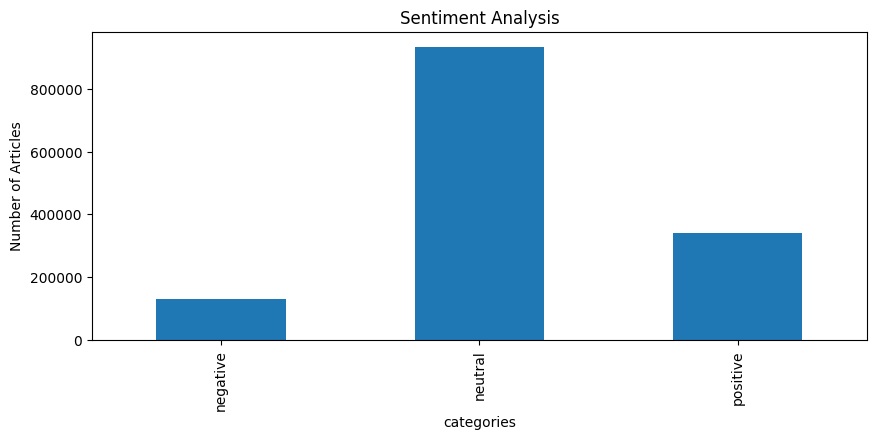

In [90]:
news_data['sentiment_unique'].value_counts().sort_index().plot(kind="bar",figsize=(10,4),title='Sentiment Analysis',xlabel='categories',ylabel='Number of Articles')

### Topic Modeling

In [43]:
# Create TF-IDF matrix
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(news_data['headline'])

# # Apply LDA
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(X)

# # Print topics
# for topic_idx, topic in enumerate(lda.components_):
#     print("Topic #{}:".format(topic_idx))
#     print(" ".join([vectorizer.get_feature_names()[i]
#                    for i in topic.argsort()[:-5 - 1:-1]]))

### Time Series Analysis:

/tmp/ipykernel_9192/1301729885.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')


<Axes: title={'center': 'number of published article in specific date'}, xlabel='Year', ylabel='number of publisher'>

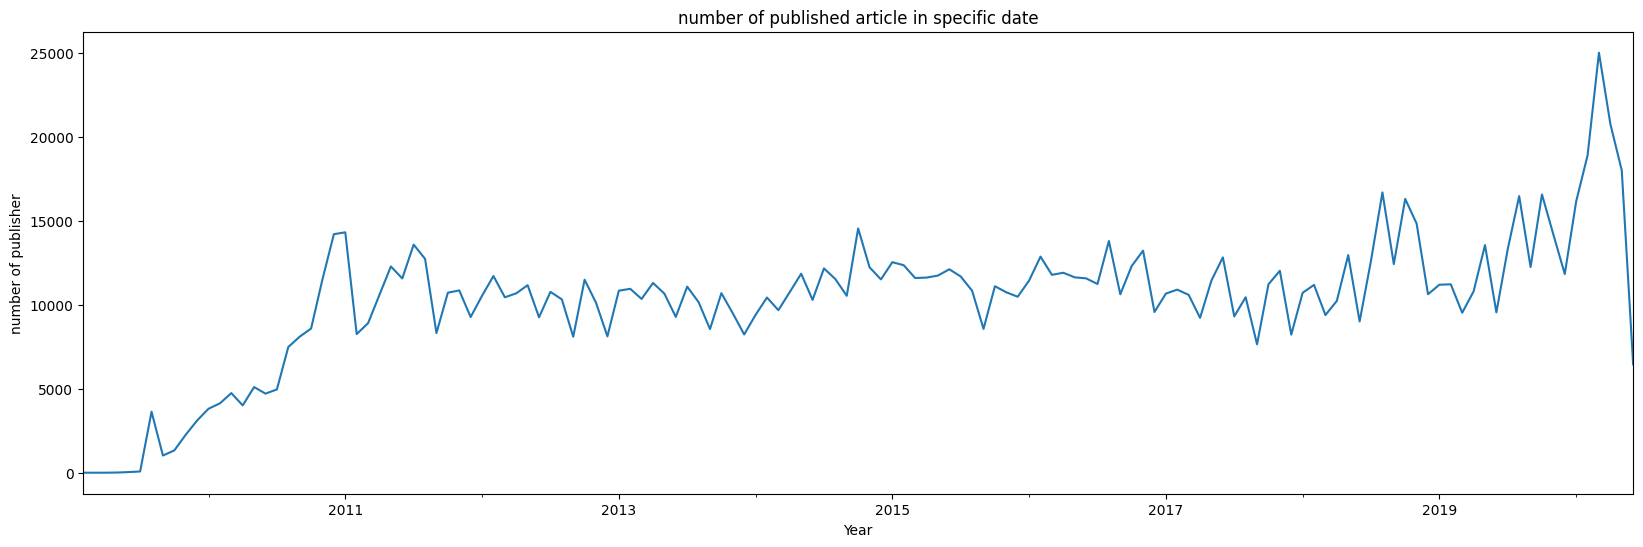

In [91]:
news_data['date'] = pd.to_datetime(news_data['date'], format='ISO8601')

news_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

# There seem to be specific peak periods where the number of published articles significantly increases. Identifying these periods can provide insights into factors driving the surge in publications.

## Publisher Analysis

### Number of articles per publisher

In [92]:
publisher_counts = news_data['publisher'].value_counts()
publisher_counts.head(n=10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

### Type of news publisher published (positive, neutral, negative)

In [93]:
publisher_sentiment = news_data.groupby('publisher')['sentiment_line'].mean()
publisher_sentiment.head()

publisher
47ertrends          0.000000
AARP                0.012755
ABNNewswire        -0.027816
Aakin               0.207273
Aaron Jackson.Ed    0.485417
Name: sentiment_line, dtype: float64

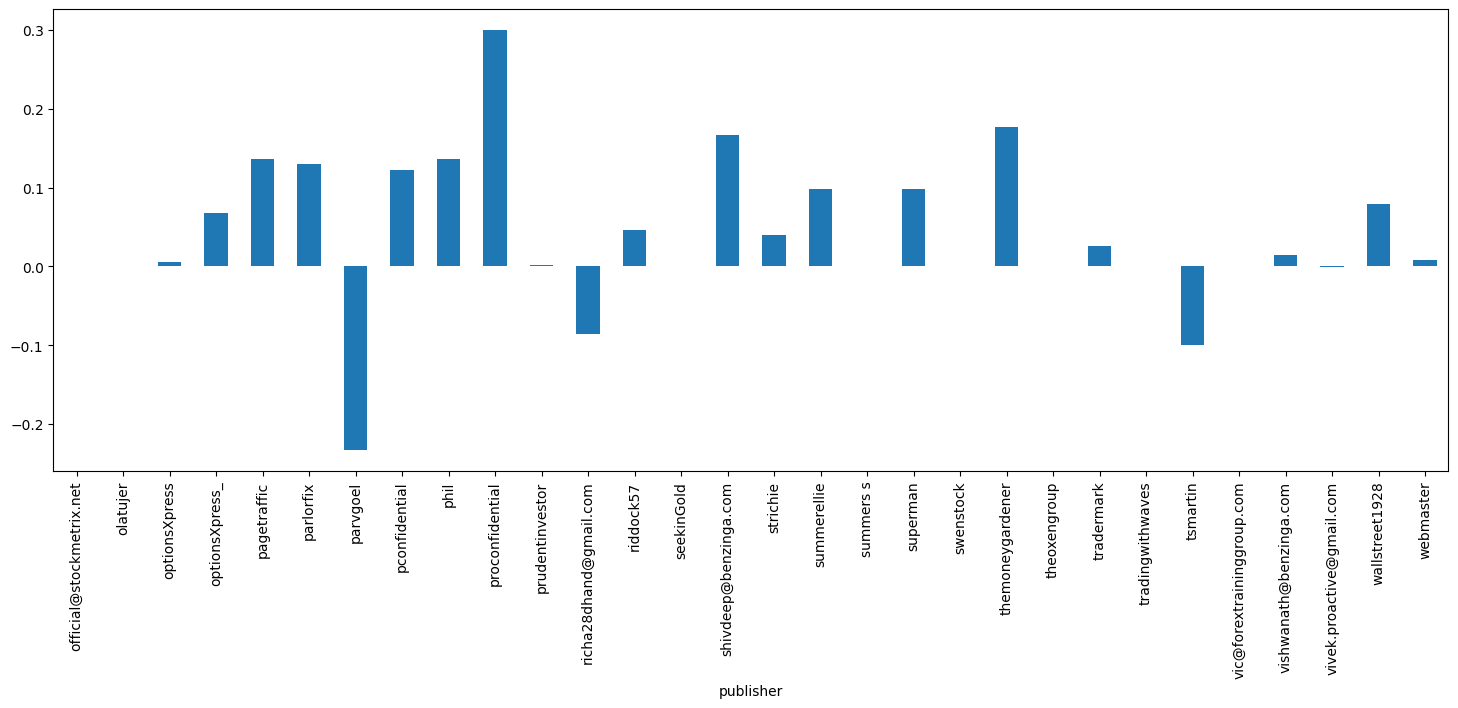

In [94]:
publisher_sentiment.tail(30).plot(kind='bar',figsize=(18,6))
plt.show()

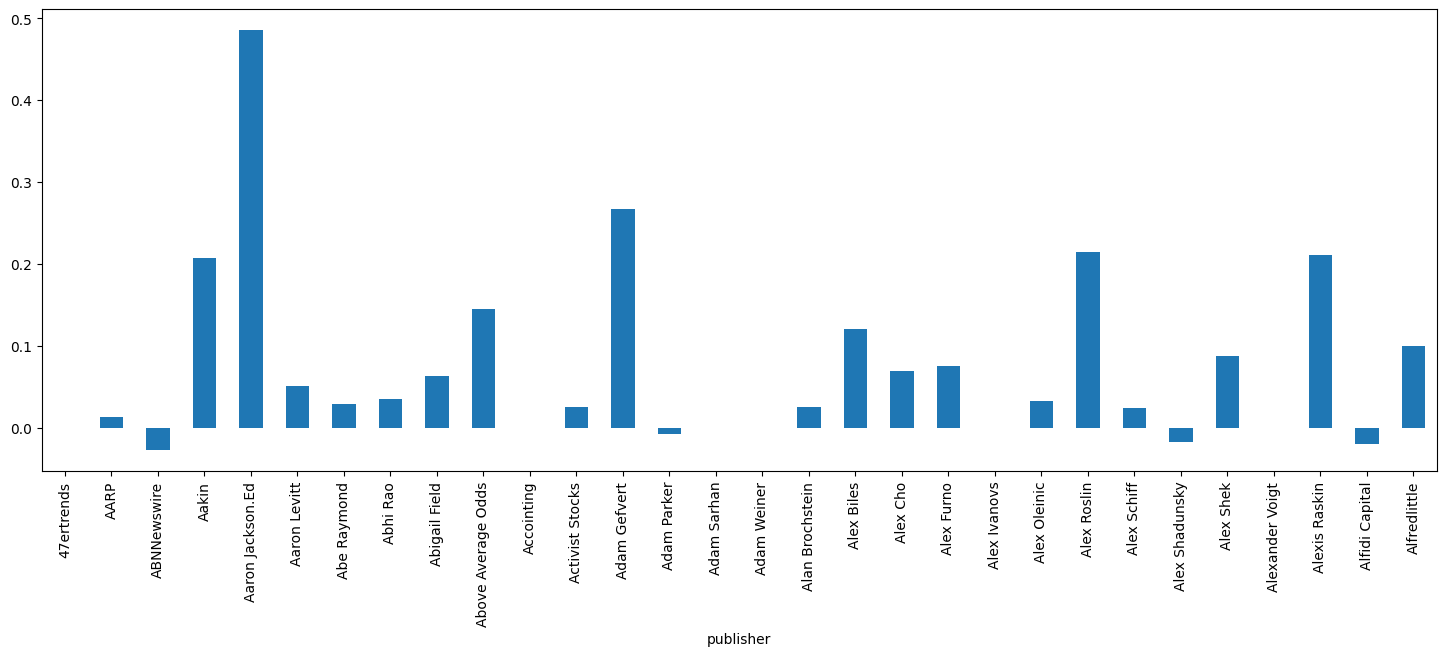

In [97]:
publisher_sentiment.head(30).plot(kind='bar',figsize=(18,6))  # Replace 'line' with 'bar', 'scatter', or other plot types as needed
plt.show()